Below is a link to another type of optimization using spike time statistics via the allen SDK
[Notebook 2](allen_test_example2.ipynb)


# Get optimization results.

Either preload pre-optimized data for 4 different experimental cell types.
Or in the absence of data, do the optimization in place below.

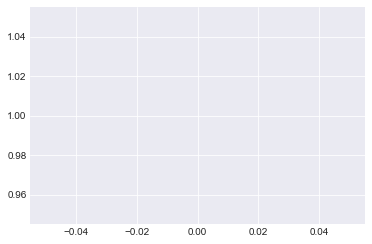

In [101]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
from jupyter_core.paths import jupyter_data_dir

import sys
import pickle

from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_dm_evaluation, transform
import os
try:
    import efel
except:
    !pip install efel
from neuronunit.optimisation.get_three_feature_sets_from_nml_db import three_feature_sets_on_static_models
#@import elephant_data_tests


try:
    results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))
except:
    try:

        os.system('wget https://www.dropbox.com/s/cod7jz4yrr55dsw/all_data_tests.p?dl=0')
        results = pickle.load(open('../unit_test/working/all_data_tests.p?dl=0','rb'))
    except:
        import elephant_data_tests

        results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))

## Load in more refined data that was output from a previous optimization process.

In [102]:
#results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))

#results
#ls ../unit_test/working/*.p

In [103]:
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']

electro_path = str(os.getcwd())+'/../tests/russell_tests.p'

assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    (test_frame,obs_frame) = pickle.load(f)
filtered_tests = {key:val for key,val in test_frame.items()}
print(filtered_tests.keys())
from neuronunit.optimisation.optimization_management import OptMan,TSD, get_dtc_pop
from neuronunit.optimisation import model_parameters


dict_keys(['Cerebellum Purkinje cell', 'Olfactory bulb (main) mitral cell', 'Hippocampus CA1 pyramidal cell', 'Neocortex pyramidal cell layer 5-6', 'Hippocampus CA1 basket cell'])


In [104]:
#type(result_ADEXP['ADEXP']['olf'][0])
ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [105]:
#type(result_ADEXP['ADEXP']['olf'][0])
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]
#result_RAW['olf']

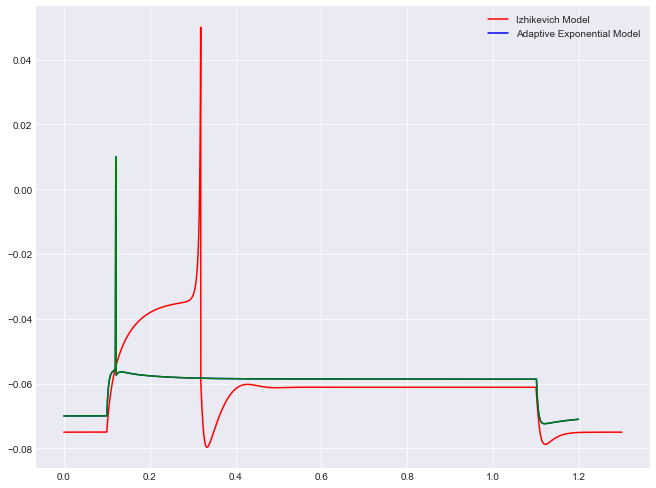

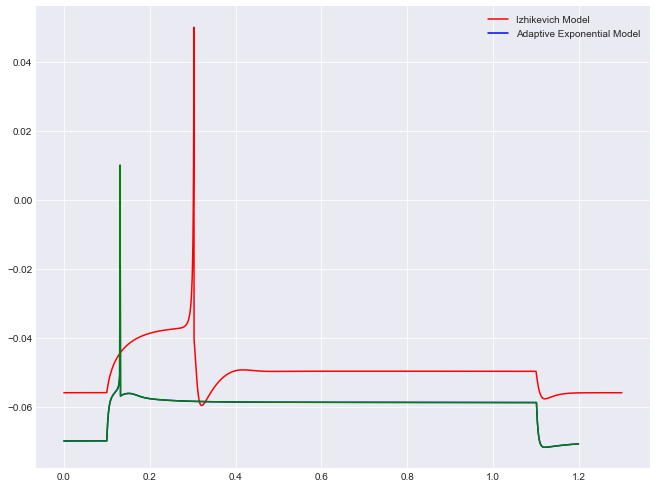

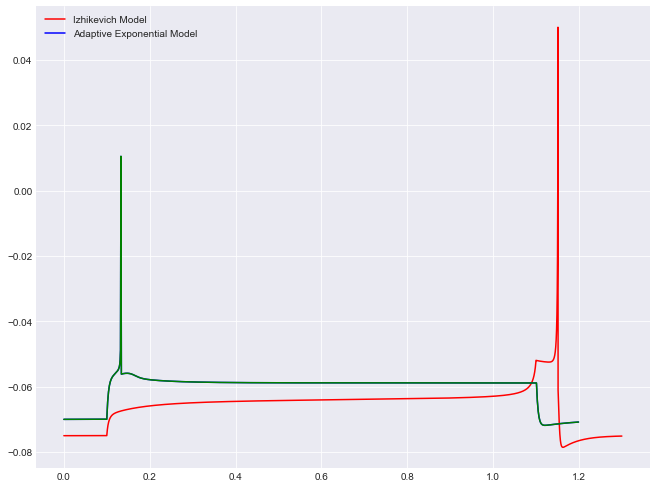

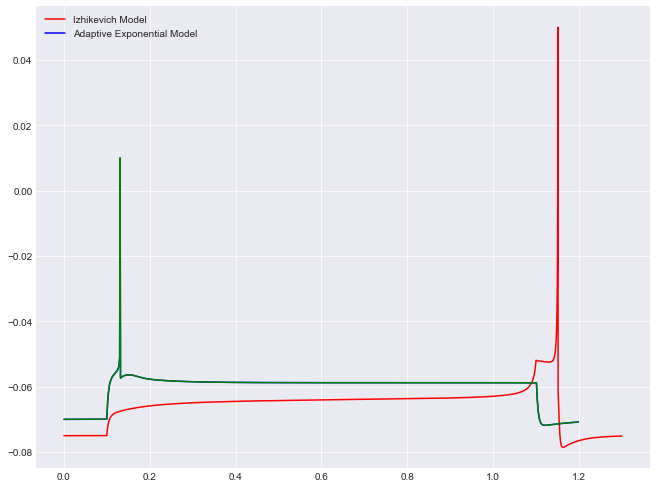

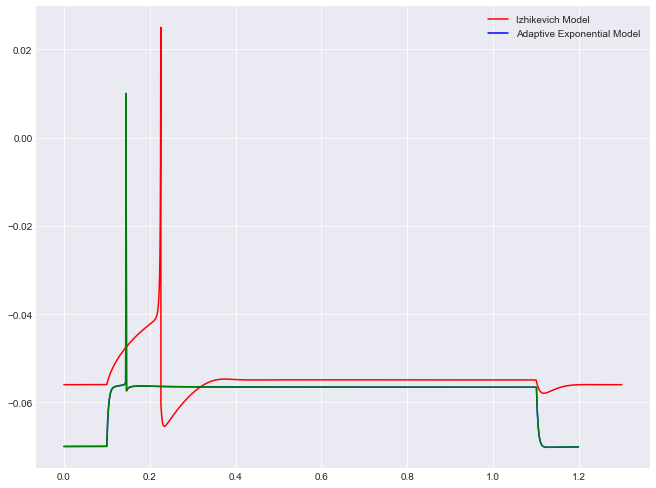

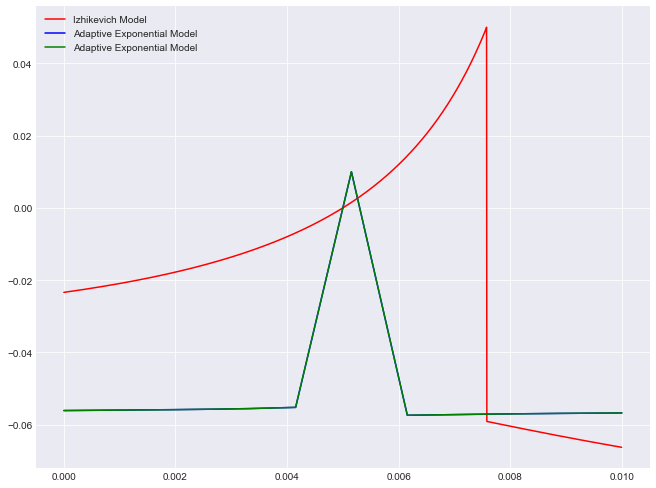

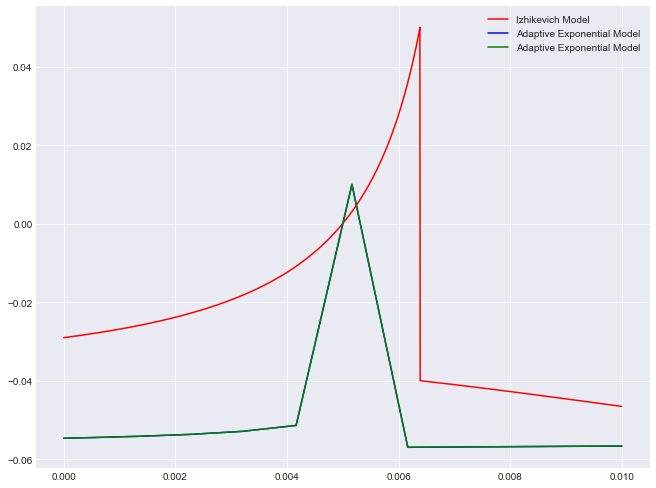

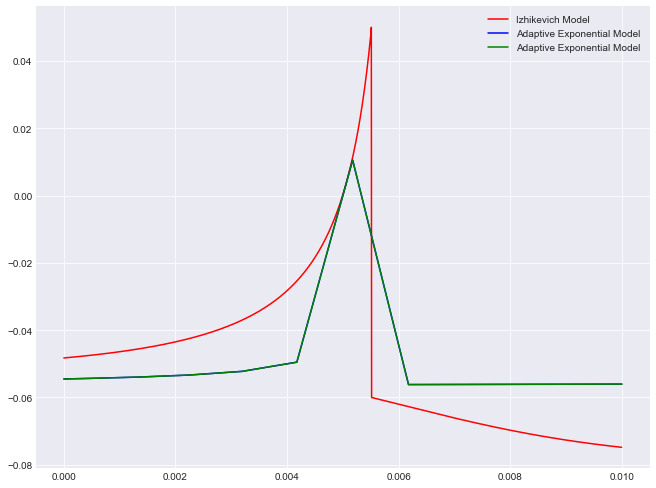

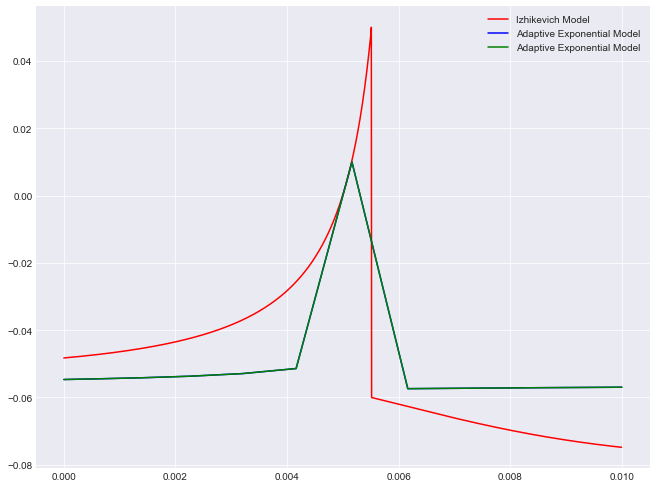

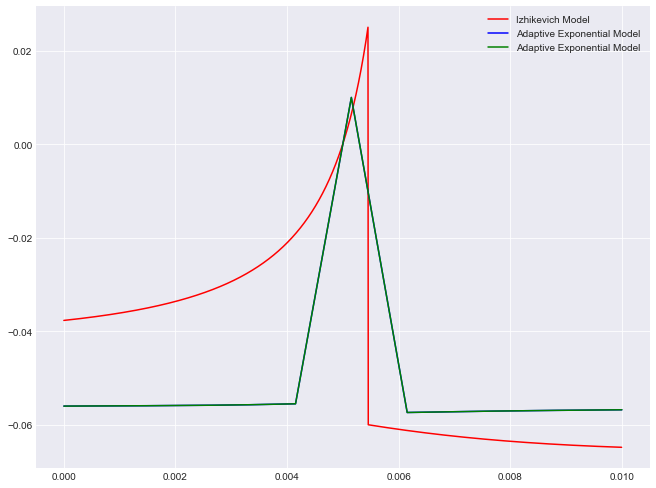

In [106]:
vm = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc])
vm = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc])
vm = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc])
vm = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc])
vm = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc])


vm = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc],snippets=True)
vm = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],snippets=True)
vm = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc],snippets=True)
vm = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc],snippets=True)
vm = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc],snippets=True)


In [107]:
try:
    #assert 1==2
    ##with open('dtcdic.p','rb') as f:
    #    dtcdic = pickle.load(f)
    ad_olf_dtc = [d for d in dtcdic['olf']][0]
    ad_purkine_dtc = [d for d in dtcdic['purkine']][0]
    ad_ca1pyr_dtc = [d for d in dtcdic['ca1pyr']][0]
    ad_ca1basket_dtc = [d for d in dtcdic['ca1basket']][0]
    ad_neo_dtc = [d for d in dtcdic['neo']][0]

    print(ad_purkine_dtc.attrs)    
    #assert hasattr(result_ADEXP['ADEXP']['olf'][0],'dtc')
    
except:
    
    #result_ADEXP
    if not hasattr(result_ADEXP['ADEXP']['olf'][0],'dtc'):
        dtcdic, DO = get_dtc_pop(result_ADEXP,filtered_tests,model_parameters)
    with open('dtcdic.p','wb') as f:
        pickle.dump(dtcdic,f)
    ad_olf_dtc = [d for d in dtcdic['olf']][0]
    ad_purkine_dtc = [d for d in dtcdic['purkine']][0]
    ad_ca1pyr_dtc = [d for d in dtcdic['ca1pyr']][0]
    ad_ca1basket_dtc = [d for d in dtcdic['ca1basket']][0]
    ad_neo_dtc = [d for d in dtcdic['neo']][0]

    print(ad_purkine_dtc.attrs)

{'ADAPTATION_TIME_CONSTANT_tau_w': 112.5, 'ADAPTATION_VOLTAGE_COUPLING_a': 0.4375, 'C': 0.875, 'FIRING_THRESHOLD_v_spike': -30.0, 'MEMBRANE_RESISTANCE_R': 0.4375, 'MEMBRANE_TIME_SCALE_tau_m': 4.375, 'RHEOBASE_THRESHOLD_v_rh': -56.25, 'SHARPNESS_delta_T': 1.75, 'SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b': 6.125, 'V_RESET': -57.375, 'V_REST': -70.0, 'b': 0.07875, 'peak_v': 0.001}


In [108]:
RAW = {str(str(k).split('_RAW')[0]):v for k,v in results.items() if "_RAW" in k}
ADEXP = {str(str(k).split('_ADEXP')[0]):v for k,v in results.items() if "_ADEXP" in k}


In [109]:
RAW.keys()
ADEXP.keys()

dict_keys(['Cerebellum Purkinje cell', 'Olfactory bulb (main) mitral cell', 'Hippocampus CA1 pyramidal cell', 'Neocortex pyramidal cell layer 5-6', 'Hippocampus CA1 basket cell'])

In [110]:
RAW_dtc_d = {}
ADEXP_dtc_d = {}
RAW_dtc = []
ADEXP_dtc = []
for k in RAW.keys():

    RAW_dtc_d[k] = [d.dtc for d in RAW[k]]
    
    ADEXP_dtc_d[k] = [d.dtc for d in ADEXP[k]]
    
    RAW_dtc = [d.dtc for d in RAW[k]]
    
    ADEXP_dtc = [d.dtc for d in ADEXP[k]]
    


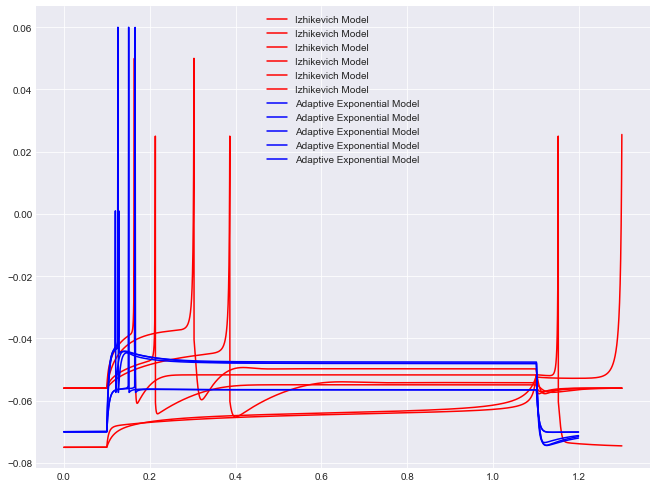

In [111]:
vm = inject_and_plot(RAW_dtc,second_pop=ADEXP_dtc)

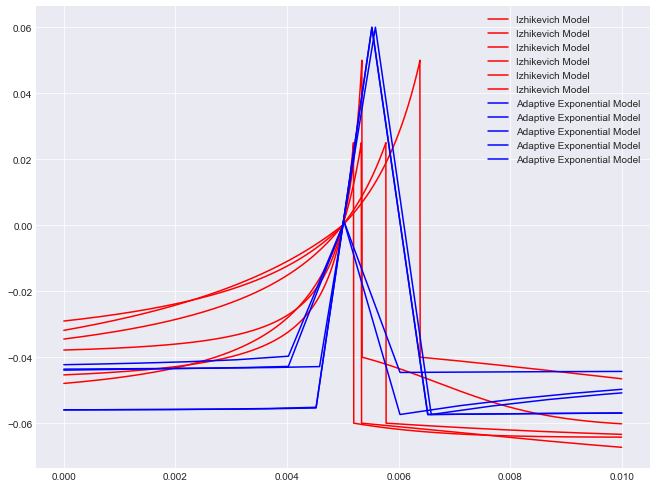

In [112]:
vm = inject_and_plot(RAW_dtc,second_pop=ADEXP_dtc,snippets=True)

In [113]:
import pandas as pd
df1 = pd.DataFrame([RAW_dtc[0].scores])
df1= df1.rename(index={0: str('Izhikivitch')})



In [114]:
df0 = pd.DataFrame([ADEXP_dtc[0].scores])
df0 = df0.rename(index={0: str('ADEXP')})

#df0.index[0] = str('ADEXP')

In [115]:
df2 = df0.append(df1)
df3 = df2.T

In [116]:
#fig.gca().set_ylabel(r'$\lambda$')


In [117]:
df3

,ADEXP,Izhikivitch
CapacitanceTest,0.225694,0.052786
InjectedCurrentAPAmplitudeTest,0.011707,0.035871
InjectedCurrentAPThresholdTest,0.053162,0.053127
InjectedCurrentAPWidthTest,0.027397,0.008059
InputResistanceTest,0.123931,1.000000
RestingPotentialTest,0.006060,0.015485
RheobaseTest,1.000000,0.001483
TimeConstantTest,0.048135,0.050954


In [118]:
compare0 = {t.name:t.observation for t in RAW_dtc[0].tests }
compare0 = {k:(v,RAW_dtc[0].predictions[k]) for k,v in compare0.items() }

In [119]:
compare1 = {t.name:t.observation for t in ADEXP_dtc[0].tests }
compare1 = {k:(v,RAW_dtc[0].predictions[k]) for k,v in compare1.items() }

In [120]:
pre_df = {}
def format_nice_frame(compare0):
    for k,v in compare0.items():
        temp = v[0][list(v[0].keys())[0]].rescale(v[1][list(v[1].keys())[0]].units)
        pre_df[k] = (temp,v[1][list(v[1].keys())[0]],v[0]['std'].rescale(v[1][list(v[1].keys())[0]].units))
        df6=pd.DataFrame([pre_df])    

    return df6  
df6 = format_nice_frame(compare0)

# compare observations and predictions:

In [121]:
df7 = format_nice_frame(compare1)#compare1
df7.T

,0
CapacitanceTest,"(1.7100000000000004e-11 s**4*A**2/(kg*m**2), 1..."
InjectedCurrentAPAmplitudeTest,"(0.07702800000000001 V, 0.025065258421045285 V..."
InjectedCurrentAPThresholdTest,"(-49.019999999999996 mV, -0.02426894132413728 ..."
InjectedCurrentAPWidthTest,"(0.00066 s, 0.00076 s, 0.0005602255943601558 s)"
InputResistanceTest,"(25630000.0 kg*m**2/(s**3*A**2), 7176641082.72..."
RestingPotentialTest,"(-0.079 V, -0.056 V, 0.028746585311335674 V)"
RheobaseTest,"(0.04 pA, 0.038884732413180245 pA, 364.3693541..."
TimeConstantTest,"(0.0205 s, 0.0008492994382773672 s, 0.01925354..."


In [122]:
df6.T

,0
CapacitanceTest,"(1.7100000000000004e-11 s**4*A**2/(kg*m**2), 1..."
InjectedCurrentAPAmplitudeTest,"(0.07702800000000001 V, 0.025065258421045285 V..."
InjectedCurrentAPThresholdTest,"(-49.019999999999996 mV, -0.02426894132413728 ..."
InjectedCurrentAPWidthTest,"(0.00066 s, 0.00076 s, 0.0005602255943601558 s)"
InputResistanceTest,"(25630000.0 kg*m**2/(s**3*A**2), 7176641082.72..."
RestingPotentialTest,"(-0.079 V, -0.056 V, 0.028746585311335674 V)"
RheobaseTest,"(0.04 pA, 0.038884732413180245 pA, 364.3693541..."
TimeConstantTest,"(0.0205 s, 0.0008492994382773672 s, 0.01925354..."


# Look at where the optimized cells reside in druckman feature space

In [123]:
RAW_dtc[0].attrs.pop('Iext',None)
attrsf0=pd.DataFrame([RAW_dtc[0].attrs])
attrsf0

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,200,0.01,15,-60,150,0.005,1.6,25,-56,-50


In [124]:
RAW_dtc[-1].attrs.pop('Iext',None)
attrsf1=pd.DataFrame([RAW_dtc[-1].attrs])
attrsf1

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,50,0.03,15,-40,150,0.005,1.6,50,-56,-40


# Do this in parallel to save time

In [125]:
import dask.bag as db
bagged = db.from_sequence(RAW_dtc)
druckman_feature_coordinates_izhi = list(bagged.map(nuunit_dm_evaluation).compute())
izhidfeatures = [d.dm_test_features for d in druckman_feature_coordinates_izhi ]


In [126]:
druck0 = pd.DataFrame([izhidfeatures[0]])
druck0 = druck0.rename(index={0: str('Izhikivitch')})


In [127]:
import dask.bag as db
bagged = db.from_sequence(ADEXP_dtc)
druckman_feature_coordinatesadexp = list(bagged.map(nuunit_dm_evaluation).compute())
dfeatures = [d.dm_test_features for d in druckman_feature_coordinatesadexp ]
druck1 = pd.DataFrame([dfeatures[0]])

In [185]:
RAW_dtc = [d.dtc for d in RAW[k]]

from neuronunit.optimisation.optimization_management import inject_and_plot, nuunit_allen_evaluation, just_allen_predictions
RAW_dtc = [d.dtc for d in RAW[k]]
RAW_dtc[0].protocols[1].keys()

RAW_dtc[0].ampl = RAW_dtc[0].protocols[1]['injected_square_current']['amplitude']*1.5
RAW_dtc[0].ampl
for i in RAW_dtc:
    i.pre_obs = None
    i.ampl = i.protocols[1]['injected_square_current']['amplitude']*4.5
    i = just_allen_predictions(i)
    #i.preds

In [191]:
RAW_dtc[4].preds

{'adapt': {'mean': 0.13016045015484365, 'std': 10.0},
 'latency': {'mean': 0.13016045015484365, 'std': 10.0},
 'isi_cv': {'mean': 0.13016045015484365, 'std': 10.0},
 'mean_isi': {'mean': 0.13016045015484365, 'std': 10.0},
 'median_isi': {'mean': 0.13016045015484365, 'std': 10.0},
 'first_isi': {'mean': 0.13016045015484365, 'std': 10.0},
 'avg_rate': {'mean': 0.13016045015484365, 'std': 10.0},
 'threshold_index': {'mean': 0.13016045015484365, 'std': 10.0},
 'clipped': {'mean': 0.13016045015484365, 'std': 10.0},
 'threshold_t': {'mean': 0.13016045015484365, 'std': 10.0},
 'threshold_v': {'mean': 0.13016045015484365, 'std': 10.0},
 'peak_index': {'mean': 0.13016045015484365, 'std': 10.0},
 'peak_t': {'mean': 0.13016045015484365, 'std': 10.0},
 'peak_v': {'mean': 0.13016045015484365, 'std': 10.0},
 'trough_index': {'mean': 0.13016045015484365, 'std': 10.0},
 'trough_t': {'mean': 0.13016045015484365, 'std': 10.0},
 'trough_v': {'mean': 0.13016045015484365, 'std': 10.0},
 'upstroke_index': {

In [128]:
druck1
druck1 = druck1.rename(index={0: str('ADEXP')})


In [129]:
druck4 = pd.DataFrame([izhidfeatures[-1]])
druck4 = druck4.rename(index={0: str('Izhi_last')})

In [130]:
druck3 = pd.DataFrame([dfeatures[-1]])
druck3 = druck3.rename(index={0: str('ADEXP_last')})
#druck3.T

In [50]:
druck2 = druck1
druck2 = druck2.append(druck0)
druck2 = druck2.append(druck3)
druck2 = druck2.append(druck4)

In [51]:
#results['Cerebellum Purkinje cell_RAW'] 
cwd = os.getcwd()
import numpy as np
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)
    
df.iloc[0][192:195]


ISIMedianTest_1.5x                   1.023500e+01
InitialAccommodationMeanTest_1.5x    3.600000e+03
InputResistanceTest_1.5x             9.773438e-14
Name: 313861539, dtype: float64

In [52]:
import numpy as np
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
druck2 = druck2.fillna(0).applymap(f)
#d2 = druck2.fillna(0).applymap(f)


#druck2.T
druck2

for col in druck2.columns:
    for dm in df.columns:
        if col in dm:
            #print(col,dm)
            #col = dm
            druck2.rename(columns={col:dm},inplace=True)


In [ ]:
#df.append()

In [85]:

# in order to find out what is seperating and what is not.
del df['InputResistanceTest_1.5x']
del df['InputResistanceTest_3.0x']

del df['ohmic_input_resistance_1.5x']
del df['ohmic_input_resistance_3.0x']
del df['time_1.5x']                              
#       0.190362
del df['decay_time_constant_after_stim_3.0x']
del df['voltage_deflection_3.0x']
del df['steady_state_hyper_3.0x']
del df['steady_state_voltage_stimend_3.0x']
del df['voltage_deflection_vb_ssse_3.0x']
del df['sag_amplitude_3.0x']
#0.198310
del df['is_not_stuck_1.5x']



# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df = df.fillna(0).applymap(f)


In [151]:
df = df.append(druck2)
df.columns
df
list_cols=[]
for col in df.columns:
    for j in druck2.columns:
        if j in col:
            for i in range(0,len(druck2)):

                #df.append(pd.Series(), ignore_index=True)

                df.ix[len(df)-1, col] = druck2.ix[i,j]
                #print(df.ix[-1, col])
                #print(col)
                list_cols.append(col)
for col in list_cols:                
    print(df.ix[-1,col])            
df

97.41618789814706
97.41618789814706
97.41618789814706
97.41618789814706
-0.03770611835311821
-0.03770611835311821
-0.03770611835311821
-0.03770611835311821
2.638808816415872e-05
2.638808816415872e-05
2.638808816415872e-05
2.638808816415872e-05
2.9411764705882377
2.9411764705882377
2.9411764705882377
2.9411764705882377
-99.91242872261871
-99.91242872261871
-99.91242872261871
-99.91242872261871
0.02001642885371021
0.02001642885371021
0.02001642885371021
0.02001642885371021
0.0699835711462898
0.0699835711462898
0.0699835711462898
0.0699835711462898
3.5300000000002
3.5300000000002
3.5300000000002
3.5300000000002
7.975000000000023
7.975000000000023
7.975000000000023
7.975000000000023
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-18.00000000001637
-18.00000000001637
-18.00000000001637
-18.00000000001637
0.0
0.0
0.0
0.0
0.17
0.17
0.17
0.17
0.0049999999999954525
0.0049999999999954525
0.0049999999999954525
0.0049999999999954525
0.03951567079633947
0.03951567079633947
0.03951567079633947
0.03951567079633947


,AHP1_depth_from_peak_1.5x,AHP1_depth_from_peak_3.0x,AHP2_depth_from_peak_1.5x,AHP2_depth_from_peak_3.0x,AHP_depth_1.5x,AHP_depth_3.0x,AHP_depth_abs_1.5x,AHP_depth_abs_3.0x,AHP_depth_abs_slow_1.5x,AHP_depth_abs_slow_3.0x,...,voltage_after_stim_1.5x,voltage_after_stim_3.0x,voltage_base_1.5x,voltage_base_3.0x,voltage_deflection_1.5x,voltage_deflection_begin_1.5x,voltage_deflection_begin_3.0x,voltage_deflection_vb_ssse_1.5x,width_1.5x,width_3.0x
313861539,-0.140875,-0.314230,-0.043996,-0.649031,-1.013960,-1.041421,0.047699,-0.080066,0.482097,0.747260,...,1.061980,1.023447,1.164034,1.121274,-0.302588,-0.499742,-0.670714,-0.526865,-0.188713,-0.660502
313861677,0.755071,0.596456,0.773132,0.765651,0.682921,0.754209,0.638227,0.588669,0.079941,0.156355,...,0.095735,-0.022135,0.062525,-0.120301,0.600402,0.639141,0.648529,0.056280,0.149711,0.768561
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571
313862167,-1.420037,-5.095333,-0.918195,-4.461191,1.010982,-0.858082,0.334368,4.710974,0.024873,3.380363,...,-0.644002,6.887520,-0.678318,7.150545,0.137361,0.980065,-1.802342,0.121161,-0.058622,-0.173571
313862167,-1.420037,-5.095333,-0.918195,-4.461191,1.010982,-0.858082,0.334368,4.710974,0.024873,3.380363,...,-0.644002,6.887520,-0.678318,7.150545,0.137361,0.980065,-1.802342,0.121161,-0.058622,-0.173571
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571
313862167,-1.420037,-1.689514,-0.918195,-1.341069,1.010982,0.961896,0.334368,0.387863,0.024873,0.237300,...,-0.644002,-0.661846,-0.678318,-0.626473,0.137361,0.980065,0.955688,0.121161,-0.058622,-0.173571


In [154]:
druck2
#print("There are %d models+data and %d features" % df.shape)
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
druck2

,AP12AHPDepthPercentChangeTest_1.5x,AP12AmplitudeChangePercentTest_1.5x,AP12AmplitudeDropTest_1.5x,AP12HalfWidthChangePercentTest_1.5x,AP12RateOfChangePeakToTroughPercentChangeTest_1.5x,AP1AHPDepthTest_1.5x,AP1AmplitudeTest_1.5x,AP1DelayMeanStrongStimTest_1.5x,AP1DelayMeanTest_1.5x,AP1DelaySDStrongStimTest_1.5x,...,Burst1ISIMeanTest_1.5x,Burst1ISISDStrongStimTest_1.5x,Burst1ISISDTest_1.5x,ISIBurstMeanChangeTest_1.5x,ISICVTest_1.5x,ISIMedianTest_1.5x,InitialAccommodationMeanTest_1.5x,InputResistanceTest_1.5x,SSAccommodationMeanTest_1.5x,SpikeRateStrongStimTest_1.5x
ADEXP,0.000000,0.000000,0.000000,0.000000,0.000000,0.117375,0.000000,3.00,6.000,0.0,...,5.0,0.0,0.0,4.547474e-12,15.85008,7.000,-29.508197,0.000351,-100.0,183.5
Izhikivitch,0.000000,0.000000,0.000000,0.000000,0.000000,0.042308,0.044997,27.48,52.530,0.0,...,0.0,0.0,0.0,0.000000e+00,0.00000,0.000,-100.000000,0.038669,-100.0,6.5
ADEXP_last,0.000000,0.000000,0.000000,0.000000,0.000000,0.117375,0.000000,3.00,7.000,0.0,...,4.0,0.0,0.0,0.000000e+00,0.00000,4.000,-24.242424,0.000031,-100.0,269.5
Izhi_last,97.416188,-0.037706,0.000026,2.941176,-99.912429,0.020016,0.069984,3.53,7.975,0.0,...,0.0,0.0,0.0,0.000000e+00,0.00000,8.215,-100.000000,0.024167,-100.0,47.5


In [158]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler#, PCA
ss = StandardScaler()
druck2[:] = ss.fit_transform(druck2.values)
druck2.groupby(druck2.index).first()
druck2 = pd.DataFrame.drop_duplicates(druck2)
print(len(druck2))
df = druck2

#df.fillna(0).applymap(f)

#new_models_idx

4


In [148]:
new_models_idx = list(range(1666,1671,1))
new_models_df = df[df.index.isin(new_models_idx)]
len(new_models_df)
new_models_idx
new_models_df

,AHP1_depth_from_peak_1.5x,AHP1_depth_from_peak_3.0x,AHP2_depth_from_peak_1.5x,AHP2_depth_from_peak_3.0x,AHP_depth_1.5x,AHP_depth_3.0x,AHP_depth_abs_1.5x,AHP_depth_abs_3.0x,AHP_depth_abs_slow_1.5x,AHP_depth_abs_slow_3.0x,...,voltage_after_stim_1.5x,voltage_after_stim_3.0x,voltage_base_1.5x,voltage_base_3.0x,voltage_deflection_1.5x,voltage_deflection_begin_1.5x,voltage_deflection_begin_3.0x,voltage_deflection_vb_ssse_1.5x,width_1.5x,width_3.0x


In [149]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
print(len(experiment_df))


698


In [90]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

698

In [91]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()

len(model_df)

973


973

ValueError: x and y must have same first dimension, but have shapes (38,) and (4,)

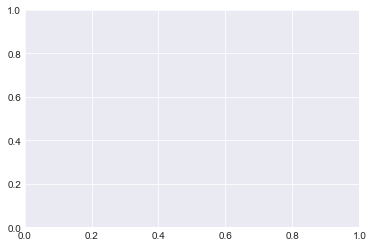

In [160]:
from sklearn.decomposition import PCA

# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.T.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [161]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels




ValueError: operands could not be broadcast together with shapes (4,38) (4,) 

<Figure size 432x288 with 0 Axes>

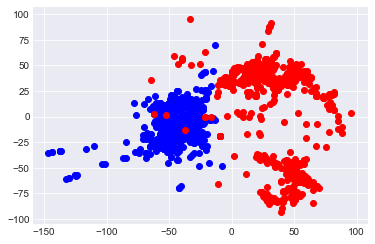

In [94]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')

In [ ]:
standard = 1.5
strong = 3.0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]

dm_labels = [list(keys.keys())[0]+str('_')+str(list(keys.values())[0])+str('x') for keys in easy_map ]
#dm_labels['AHP_depth_abs_slow_1.5x']

#dir()

In [ ]:

druck2.columns        
#df.append(druck2)
druck2
#df.columns

In [ ]:
druck2.columns
df.append(druck2)
df['AP12AmplitudeDropTest_1.5x']
druck2['AP12AmplitudeDropTest_1.5x']

### df['AP12AmplitudeDropTest_1.5x']